In [27]:
import numpy as np
from empiricaldist import Pmf
import matplotlib.pyplot as plt
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [3]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [22]:
data = 60
posterior = prior.copy()
posterior

,probs
1,1
2,1
3,1
4,1
5,1
...,...
996,1
997,1
998,1
999,1


In [23]:
update_train(posterior, data)
posterior

,probs
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
...,...
996,0.000356
997,0.000355
998,0.000355
999,0.000355


In [4]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

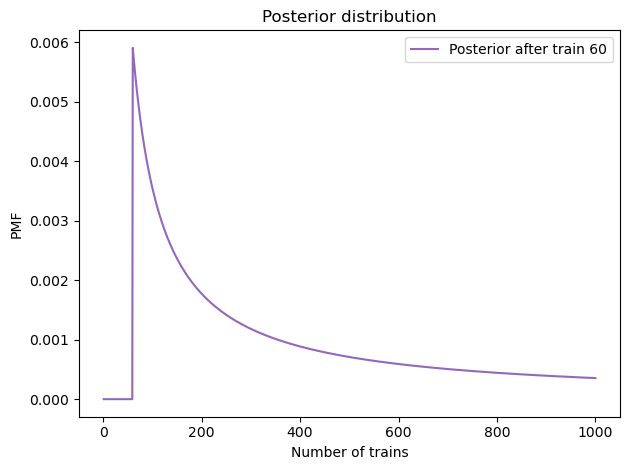

In [5]:
from utils import decorate

posterior.plot(label='Posterior after train 60', color='C4')
decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distribution')

In [6]:
posterior.max_prob()

60

In [7]:
np.sum(posterior.ps * posterior.qs)

333.41989326370776

In [8]:
posterior.mean()

333.41989326370776

In [9]:
import pandas as pd

df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    update_train(pmf, data=60)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,207.079228
1000,333.419893
2000,552.179017


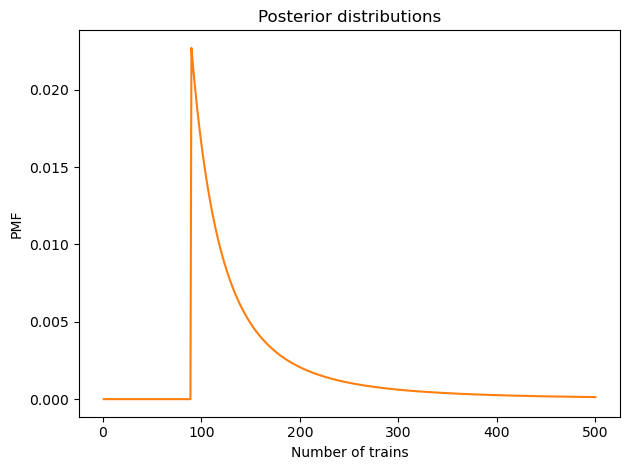

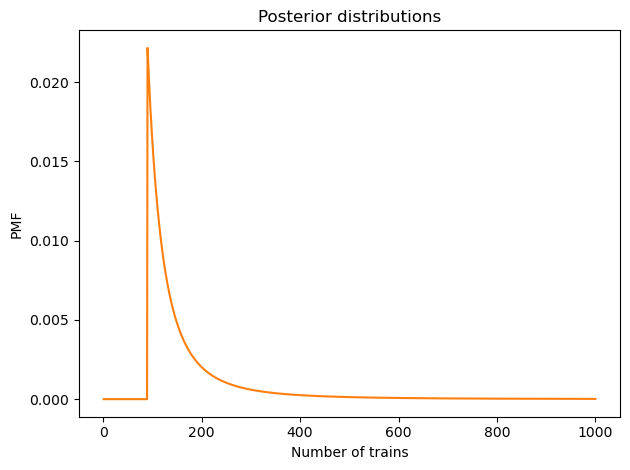

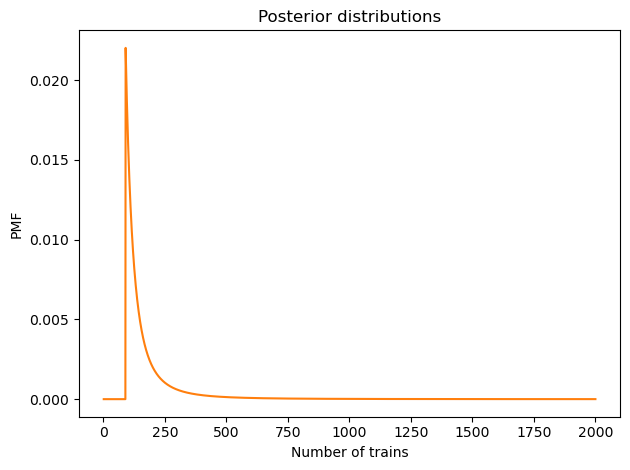

,Posterior mean
Upper bound,
500,151.849588
1000,164.305586
2000,171.338181


In [29]:
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    for data in dataset:
        update_train(pmf, data)
    df.loc[high] = pmf.mean()

    pmf.plot(color='C1')
    decorate(xlabel='Number of trains',
            ylabel='PMF',
            title='Posterior distributions')
    plt.show()
    
    
df

In [11]:
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

8.178368103610282

In [12]:
hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

1000

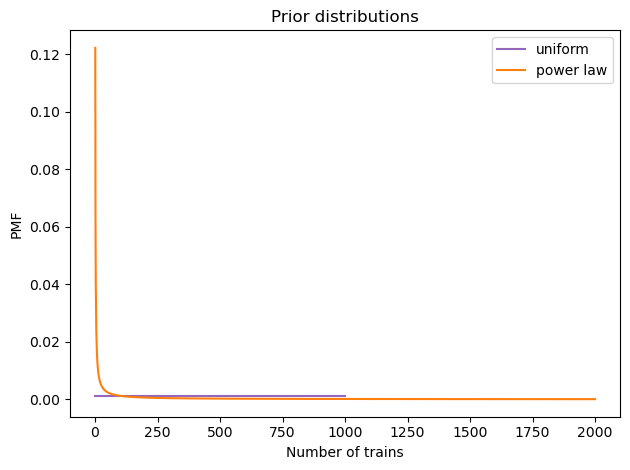

In [13]:
uniform.plot(color='C4')
power.plot(color='C1')

decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Prior distributions')

In [14]:
dataset = [60]
update_train(uniform, dataset)
update_train(power, dataset)

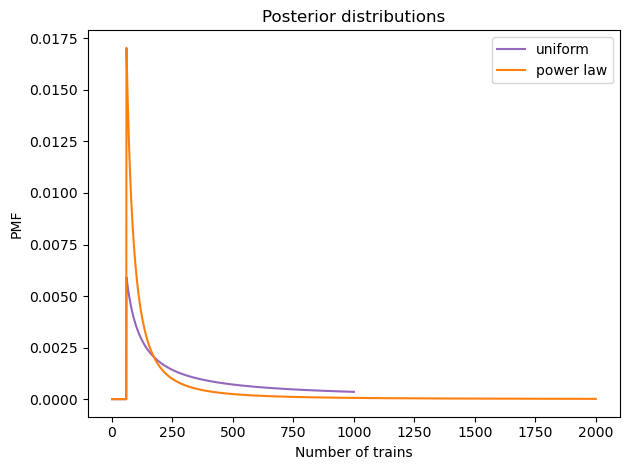

In [15]:
uniform.plot(color='C4')
power.plot(color='C1')

decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distributions')

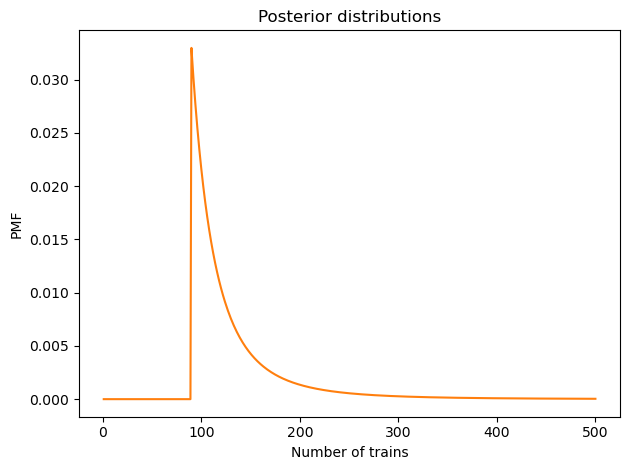

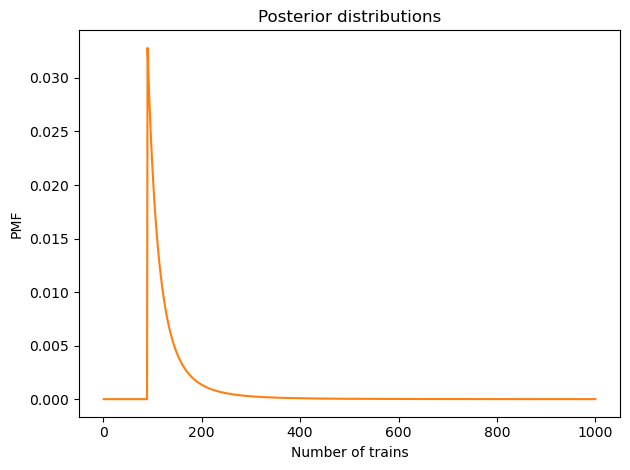

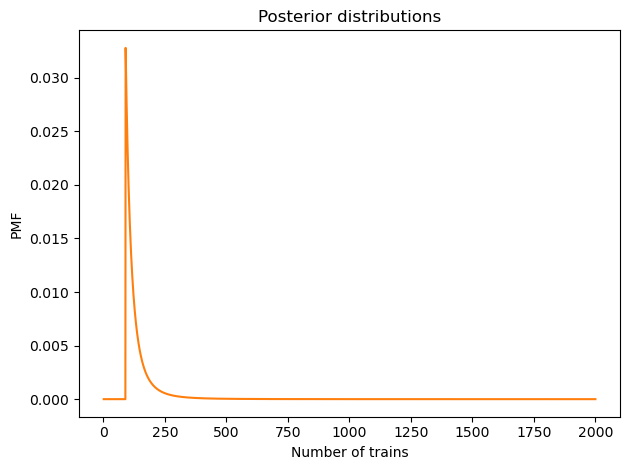

,Posterior mean
Upper bound,
500,130.708470
1000,133.275231
2000,133.997463


In [28]:
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

alpha = 1.0
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    ps = hypos**(-alpha)
    power = Pmf(ps, hypos)
    for data in dataset:
        update_train(power, data)
    df.loc[high] = power.mean()
    
    power.plot(color='C1')
    decorate(xlabel='Number of trains',
            ylabel='PMF',
            title='Posterior distributions')
    plt.show()
    
df

In [17]:
power.prob_le(100)

0.2937469222495771

In [18]:
def quantile(pmf, prob):
    """Compute a quantile with the given prob."""
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

In [19]:
quantile(power, 0.5)

113

In [20]:
power.quantile([0.05, 0.95])

array([ 91., 243.])

In [21]:
power.credible_interval(0.9)

array([ 91., 243.])